In [1]:
import pandas as pd

In [2]:
from mlxtend.preprocessing import TransactionEncoder

In [3]:
from mlxtend.frequent_patterns import fpgrowth

In [4]:
from mlxtend.frequent_patterns import apriori

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from matplotlib.pyplot import figure

In [4]:
df = pd.read_csv("C:\L\CAP4770\project\Crime_Incidents - Crime_Incidents.csv")

In [3]:
crime = df.groupby(['Incident Type']).size()
#crime = crime.sort_values(ascending = False)
crime

Incident Type
Affray                                              306
Aircraft Incident                                     6
Alcohol Beverage-possess by Person Under 21 Yoa       1
All Other Liquor Law Viol.                           44
Animal Attack                                       118
                                                   ... 
Violation of Temporary Injunction                   123
Warrant Arrest                                     3706
Weapons Violation                                   135
Weapons Violation (possessing/concealing)           281
Written Threat to Kill or Injure                     54
Length: 218, dtype: int64

In [5]:
def discTime(hr):
	if hr >= 0 and hr <= 7:
		return '0-7'
	if hr >= 8 and hr <= 15:
		return '8-15'
	if hr >= 16 and hr <= 23:
		return '16-23'

df['Time Interval'] = df.apply(
lambda row: discTime(row['Offense Hour of Day']), axis=1
)
df.head()

,ID,Incident Type,Report Date,Offense Date,Report Hour of Day,Report Day of Week,Offense Hour of Day,Offense Day of Week,City,State,...,Longitude,Location,2010 Census Tracts,Commission Districts,Gainesville Police Districts,Florida Census Zip Codes,:@computed_region_9cfm_spy5,:@computed_region_43jd_v64e,:@computed_region_ndi2_bfht,Time Interval
0,219015073,NaN,9/17/2019 9:02,9/17/2019 9:02,9,Tuesday,9,Tuesday,GAINESVILLE,FL,...,-82.329.994,POINT (-82.329994 29.659423),1.0,1.0,1.0,772,2.0,14.0,1.0,8-15
1,219015126,property,9/17/2019 7:24,8/28/2019 13:15,7,Tuesday,13,Wednesday,GAINESVILLE,FL,...,-82.310.184,POINT (-82.310184 29.643188),5.0,1.0,1.0,"1,082",NaN,18.0,1.0,8-15
2,219015352,property,9/17/2019 12:05,9/11/2019 17:30,12,Tuesday,17,Wednesday,GAINESVILLE,FL,...,-82.384.569,POINT (-82.384569 29.680912),8.0,3.0,5.0,769,NaN,6.0,5.0,16-23
3,219015384,theft grand,9/17/2019 7:47,9/16/2019 22:00,7,Tuesday,22,Monday,GAINESVILLE,FL,...,-82.383.886,POINT (-82.383886 29.625653),32.0,3.0,12.0,767,NaN,7.0,12.0,16-23
4,219015393,property,9/17/2019 15:00,9/16/2019 21:00,15,Tuesday,21,Monday,GAINESVILLE,FL,...,-82.415.928,POINT (-82.415928 29.659716),35.0,3.0,10.0,770,NaN,4.0,10.0,16-23


In [30]:
df.to_csv(r'C:\L\CAP4770\project\Project_Data', index = False)

In [7]:
df = pd.read_csv("C:\L\CAP4770\project\Project_Data2.csv", index_col = False)
df.head()

,Gainesville Police Districts,Time Interval,Report Day of Week,Incident Type
0,1,15-Aug,Tuesday,property
1,5,16-23,Tuesday,property
2,12,16-23,Tuesday,theft grand
3,10,16-23,Tuesday,property
4,4,15-Aug,Tuesday,trespassing


In [8]:
def discTime(hr):
    if hr == '15-Aug':
        return '8-15'
    else:
        return hr

df['Time Interval'] = df.apply(
lambda row: discTime(row['Time Interval']), axis=1
)
df.head()

,Gainesville Police Districts,Time Interval,Report Day of Week,Incident Type
0,1,8-15,Tuesday,property
1,5,16-23,Tuesday,property
2,12,16-23,Tuesday,theft grand
3,10,16-23,Tuesday,property
4,4,8-15,Tuesday,trespassing


In [9]:
df['Gainesville Police Districts'] = df['Gainesville Police Districts'].astype(str)
df['Time Interval'] = df['Time Interval'].astype(str)
df['Incident Type'] = df['Incident Type'].astype(str)
df['Report Day of Week'] = df['Report Day of Week'].astype(str)
dataset = df.values.tolist()
dataset

[['1', '8-15', 'Tuesday', 'property'],
 ['5', '16-23', 'Tuesday', 'property'],
 ['12', '16-23', 'Tuesday', 'theft grand'],
 ['10', '16-23', 'Tuesday', 'property'],
 ['4', '8-15', 'Tuesday', 'trespassing'],
 ['2', '0-7', 'Tuesday', 'death related'],
 ['3', '16-23', 'Tuesday', 'burglary'],
 ['7', '8-15', 'Tuesday', 'weapon'],
 ['1', '8-15', 'Tuesday', 'theft petit'],
 ['10', '8-15', 'Tuesday', 'domestic'],
 ['12', '8-15', 'Tuesday', 'death related'],
 ['2', '8-15', 'Tuesday', 'property'],
 ['12', '8-15', 'Tuesday', 'fraud'],
 ['1', '8-15', 'Tuesday', 'city ordinance'],
 ['2', '8-15', 'Tuesday', 'city ordinance'],
 ['3', '8-15', 'Tuesday', 'battery'],
 ['4', '8-15', 'Tuesday', 'battery'],
 ['12', '8-15', 'Tuesday', 'theft petit'],
 ['4', '8-15', 'Tuesday', 'theft petit'],
 ['12', '8-15', 'Tuesday', 'trespassing'],
 ['1', '16-23', 'Tuesday', 'death related'],
 ['2', '8-15', 'Tuesday', 'theft petit'],
 ['6', '8-15', 'Tuesday', 'burglary'],
 ['12', '16-23', 'Tuesday', 'theft grand'],
 ['6', 

In [137]:
df.dtypes

Gainesville Police Districts    object
Time Interval                   object
Report Day of Week              object
Incident Type                   object
dtype: object

In [10]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
te_ary

array([[False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [11]:
fs = pd.DataFrame(te_ary, columns=te.columns_)
result = fpgrowth(fs, min_support=0.0001, use_colnames=True, max_len = 4)

In [13]:
result = result.sort_values(by=['support'], ascending=False)

In [141]:
result.dtypes

support     float64
itemsets     object
dtype: object

In [14]:
result.head(20)

,support,itemsets
4,0.390280,(16-23)
0,0.353431,(8-15)
11,0.256290,(0-7)
1,0.250303,(1)
12,0.210155,(2)
18,0.160968,(theft petit)
38,0.152070,(Friday)
33,0.150495,(Thursday)
26,0.150332,(Wednesday)
35,0.149225,(Monday)


In [14]:
result2 =  result[result['itemsets'].map(len) > 1]
result2.head(20)

,support,itemsets
1210,0.088280,"(16-23, 2)"
57,0.087960,"(1, 16-23)"
58,0.082419,"(0-7, 1)"
56,0.079923,"(1, 8-15)"
1209,0.077643,"(2, 8-15)"
1862,0.065996,"(theft petit, 8-15)"
1866,0.059631,"(theft petit, 16-23)"
4393,0.059393,"(16-23, Friday)"
3412,0.058145,"(16-23, Wednesday)"
4326,0.057625,"(16-23, Monday)"


In [144]:
result2 =  result[result['itemsets'].map(len) > 2]
result2.head(20)

,support,itemsets
1870,0.015286,"(theft petit, 2, 8-15)"
4356,0.014306,"(1, Sunday, 0-7)"
4173,0.014232,"(1, Thursday, 8-15)"
3718,0.014105,"(Saturday, 1, 0-7)"
65,0.013868,"(1, Tuesday, 8-15)"
4401,0.013623,"(Friday, 16-23, 1)"
1868,0.013511,"(theft petit, 1, 0-7)"
3419,0.013489,"(1, Wednesday, 8-15)"
4174,0.013437,"(1, 16-23, Thursday)"
70,0.013266,"(2, 16-23, Tuesday)"


In [19]:
result2 =  result[result['itemsets'].map(len) > 3].copy()
result2.head(20)

,support,itemsets
4345,0.002540,"(8-15, 2, Monday, theft petit)"
4343,0.002444,"(theft petit, 0-7, Monday, 1)"
78,0.002377,"(theft petit, 8-15, Tuesday, 2)"
3431,0.002317,"(theft petit, 8-15, Wednesday, 2)"
4185,0.002295,"(theft petit, 8-15, Thursday, 2)"
3738,0.002280,"(theft petit, 16-23, Saturday, 2)"
76,0.002251,"(theft petit, 8-15, Tuesday, 1)"
2022,0.002147,"(8-15, domestic, 2, Friday)"
3625,0.002139,"(drug, 8-15, Thursday, 1)"
81,0.002110,"(theft petit, Tuesday, 0-7, 1)"


In [20]:
result2 = result.copy()
result2['itemsets'] = result2['itemsets'].astype(str)

In [17]:
result2

,support,itemsets
4,0.390280,frozenset({'16-23'})
0,0.353431,frozenset({'8-15'})
11,0.256290,frozenset({'0-7'})
1,0.250303,frozenset({'1'})
12,0.210155,frozenset({'2'})
...,...,...
3822,0.000104,"frozenset({'8-15', 'robbery', 'Saturday', '1'})"
957,0.000104,"frozenset({'drug', '8-15', 'Wednesday', '10'})"
3781,0.000104,"frozenset({'robbery', 'Saturday', '16-23', '4'})"
4610,0.000104,"frozenset({'16-23', 'Saturday', 'suspicious in..."


In [21]:
def cutStr(s):
        return (s[11:-2])

result2['itemsets'] = result2.apply(
lambda row: cutStr(row['itemsets']), axis=1
)
result2.head()

,support,itemsets
4,0.390280,'16-23'
0,0.353431,'8-15'
11,0.256290,'0-7'
1,0.250303,'1'
12,0.210155,'2'


In [100]:
result2.head(20)

,support,itemsets
4,0.390280,'16-23'
0,0.353431,'8-15'
11,0.256290,'0-7'
1,0.250303,'1'
12,0.210155,'2'
18,0.160968,'theft petit'
38,0.152070,'Friday'
33,0.150495,'Thursday'
26,0.150332,'Wednesday'
35,0.149225,'Monday'


In [22]:
temp = result2[0:10]
label = temp['itemsets'].tolist()
label

["'16-23'",
 "'8-15'",
 "'0-7'",
 "'1'",
 "'2'",
 "'theft petit'",
 "'Friday'",
 "'Thursday'",
 "'Wednesday'",
 "'Monday'"]

In [23]:
from textwrap import wrap
label = [ '\n'.join(wrap(l, 15)) for l in label ]

In [24]:
label

["'16-23'",
 "'8-15'",
 "'0-7'",
 "'1'",
 "'2'",
 "'theft petit'",
 "'Friday'",
 "'Thursday'",
 "'Wednesday'",
 "'Monday'"]

In [25]:
sp = temp['support'].tolist()

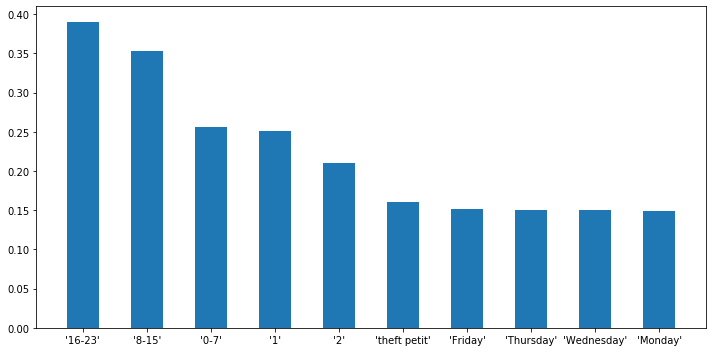

In [28]:
x = np.arange(10)
new_x = [3*i for i in x]
#fig, ax = plt.subplots()
#ax.set_xticks(new_x)
#ax.set_xticklabels(label)

plt.figure(figsize=(10, 5))
plt.xticks(new_x, label)
plt.bar( new_x,sp, align='center',width = 1.5)
plt.tight_layout()
plt.show()

In [29]:
plt.savefig('C:\L\CAP4770\project\FP_1')

<Figure size 432x288 with 0 Axes>